# Business Problem
One of the challenges for companies is employee attrition, particularly when it leads to the loss of skilled workers, increased recruitment costs, and reduced overall productivity. Understanding the employee attrition patterns and identifying key factors that influence attrition can help companies develop strategies to improve employee retention.

# Business Questions
1. What is the overall attrition rate in the company?
2. Which job roles have the highest attrition rates?
3. What factors are associated with high attrition rates in job roles with the highest attrition rates?
4. Are there spesific employee groups that are more likely leave the company?
5. How does attrition trend vary across different levels of total working experience?

# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Skills/Portfolio/Dataset/HR-Employee-Attrition-Messy.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Cleansing

## Handling Missing Values

In [3]:
#check missing values
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Total Missing Values']

#show columns that have missing values
missing_values_count = missing_values[missing_values['Total Missing Values'] > 0]
missing_values_count

,Column,Total Missing Values
0,Age,15
4,Department,10


Imputation missing values with mean and mode

In [4]:
df_clean = df.copy()

#imputation 'Age' with mean
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].mean().round())

#imputation 'Department' with mode
df_clean['Department'] = df_clean['Department'].fillna(df_clean['Department'].mode()[0])

In [5]:
#re-check missing values
df_clean.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Data Correction

### Change Data Type 


In [6]:
df_clean['Age'] = df_clean['Age'].astype('Int64')

In [7]:
df_clean[['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel']] = df_clean[['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel']].astype('category')

In [8]:
df_clean.dtypes

Age                            Int64
Attrition                     object
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                   category
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                        object
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                       object
JobSatisfaction             category
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
S

### Fix Incorrect Values in Categorical Columns

In [9]:
#print unique values of categorical columns
for col in df_clean.describe(include = 'object').columns:
    print(col)
    print(df_clean[col].unique())
    print('-' * 70)

Attrition
['Yes' 'No']
----------------------------------------------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Travel_Freque' 'Non-Travel']
----------------------------------------------------------------------
Department
['Sales' 'Research & Development' 'Reseach & Development'
 'Human Resources']
----------------------------------------------------------------------
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------------------------------------------
Gender
['Female' 'Male' 'Mle']
----------------------------------------------------------------------
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
----------------------------------------------------------------------
MaritalStatus
['Single' 'Married' 'Divorced']
---

#### Gender Category
replace 'Mle' with 'Male'

In [10]:
df_clean['Gender'] = df_clean['Gender'].str.replace('Mle', 'Male')
print(df_clean['Gender'].unique())

['Female' 'Male']


#### Business Travel Category
replace 'Travel_Freque' with 'Travel_Frequently'

In [11]:
df_clean['BusinessTravel'] = df_clean['BusinessTravel'].replace('Travel_Freque', 'Travel_Frequently')

In [12]:
df_clean['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

#### Department Category
replace 'Reseach & Development' with 'Research & Development'

In [13]:
df_clean['Department'] = df_clean['Department'].str.replace('Reseach & Development', 'Research & Development')
df_clean['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

### Filter Total Working Years with positive value only

In [14]:
(df_clean['TotalWorkingYears'] < 0).any()

np.True_

Since there are negative values for total working years, we are only using the positive ones.

In [15]:
df_clean = df_clean[df_clean['TotalWorkingYears'] >= 0]

## Duplication

In [16]:
#check duplication
print(df_clean.duplicated().sum())

0


## Outlier Detection and Removal

In [17]:
df_clean.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1473.0,1473.000000,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,36.928038,802.702648,9.183978,1.0,740.982349,65.882553,6501.703327,14326.982349,2.695180,15.211813,80.0,11.281738,2.799050,2.762390,7.000000,4.223354,2.181263,4.116090
std,9.099106,403.683493,8.099967,0.0,425.393219,20.308401,4704.207326,7122.524263,2.499747,3.658477,0.0,7.788303,1.286563,0.706548,6.126275,3.625423,3.216445,3.567207
min,18.0,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.0,465.000000,2.000000,1.0,373.000000,48.000000,2911.000000,8053.000000,1.000000,12.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.0,802.000000,7.000000,1.0,741.000000,66.000000,4930.000000,14242.000000,2.000000,14.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.0,1157.000000,14.000000,1.0,1109.000000,83.000000,8380.000000,20467.000000,4.000000,18.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.0,1499.000000,29.000000,1.0,1477.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [18]:
df_clean['MonthlyIncome'].describe()

count     1473.000000
mean      6501.703327
std       4704.207326
min       1009.000000
25%       2911.000000
50%       4930.000000
75%       8380.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

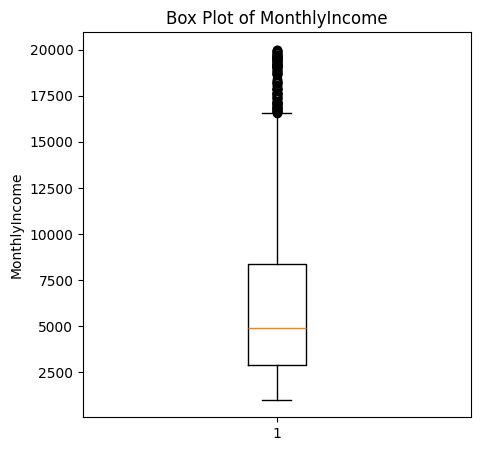

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(5, 5))
plt.boxplot(df_clean['MonthlyIncome'])
plt.title('Box Plot of MonthlyIncome')
plt.ylabel('MonthlyIncome')
plt.show()

In [20]:
def outliers(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  return (x < lower_bound) | (x > upper_bound)

outliers_mask = outliers(df_clean['MonthlyIncome'])
outliers_detected = df_clean[outliers_mask]
outliers_detected

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
24,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,28,...,4,80,1,26,3,2,14,13,4,8
28,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,32,...,4,80,0,22,2,2,2,2,2,1
44,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,48,...,4,80,0,23,0,3,22,15,15,8
61,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,65,...,4,80,1,29,2,2,27,3,13,8
104,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,108,...,4,80,1,30,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1377,...,3,80,1,29,2,2,1,0,0,0
1376,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,1380,...,4,80,0,28,3,3,5,4,4,3
1400,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,1404,...,1,80,1,35,0,3,10,9,1,4
1436,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,1440,...,3,80,0,21,3,2,6,0,1,3


delete outliers

In [21]:
df_clean = df_clean[~outliers_mask]
df_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,37,No,Travel_Rarely,866,Sales,5,3,Medical,1,1473,...,4,80,0,6,4,3,5,4,1,3
1470,37,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,1474,...,3,80,2,5,3,3,4,2,1,3
1471,37,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1475,...,3,80,1,1,2,3,1,0,0,0
1472,37,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,1476,...,3,80,1,25,2,3,1,0,0,0


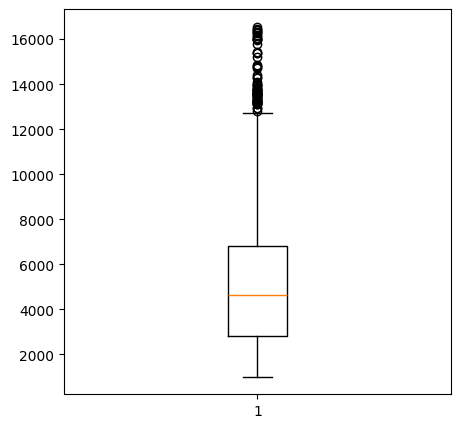

In [22]:
plt.figure(figsize=(5, 5))
plt.boxplot(df_clean['MonthlyIncome'])
plt.show()

## Dropping Unnecessary Column

In [23]:
df_clean = df_clean.drop(columns = ['EmployeeCount', 'Over18','Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'])

In [24]:
df_clean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EmployeeNumber', 'Gender', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'TotalWorkingYears'],
      dtype='object')

## Label Encoding

encoding job satisfaction categories into descriptive labels

In [25]:
satisfaction_map = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Satisfied',
    4: 'Very Satisfied'
}

df_clean['Job_Satisfaction_Cat'] = df_clean['JobSatisfaction'].map(satisfaction_map)
df_clean['Job_Satisfaction_Cat'].unique()

['Very Satisfied', 'Dissatisfied', 'Satisfied', 'Very Dissatisfied']
Categories (4, object): ['Very Dissatisfied', 'Dissatisfied', 'Satisfied', 'Very Satisfied']

# Exploratory Data Analysis (EDA)

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1473
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   1359 non-null   Int64   
 1   Attrition             1359 non-null   object  
 2   BusinessTravel        1359 non-null   object  
 3   DailyRate             1359 non-null   int64   
 4   Department            1359 non-null   object  
 5   DistanceFromHome      1359 non-null   int64   
 6   EmployeeNumber        1359 non-null   int64   
 7   Gender                1359 non-null   object  
 8   JobRole               1359 non-null   object  
 9   JobSatisfaction       1359 non-null   category
 10  MaritalStatus         1359 non-null   object  
 11  MonthlyIncome         1359 non-null   int64   
 12  OverTime              1359 non-null   object  
 13  TotalWorkingYears     1359 non-null   int64   
 14  Job_Satisfaction_Cat  1359 non-null   category
dtypes: Int64(

## Q1. What is The Overall Attrition Rate in The Company?

In [27]:
attrition = df_clean['Attrition'].value_counts().reset_index()
attrition

,Attrition,count
0,No,1126
1,Yes,233


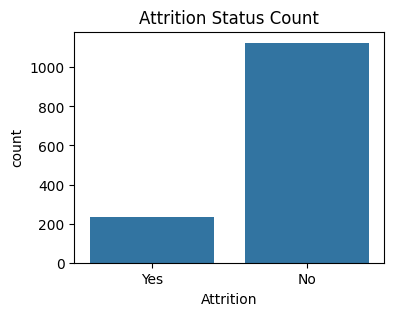

In [28]:
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.countplot(data = df_clean, x = 'Attrition')
plt.title('Attrition Status Count')
plt.show()

In [29]:
#attrition rate
att_yes = df_clean['Attrition'].value_counts()['Yes']
att_total = df_clean['Attrition'].count()

attrition_rate = (att_yes/att_total) * 100

print(f'Attrition Rate (Yes) = {attrition_rate:.2f}%')

Attrition Rate (Yes) = 17.14%


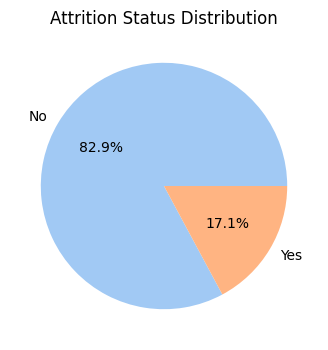

In [30]:
plt.figure(figsize = (4,4))
plt.pie(attrition['count'], labels = attrition['Attrition'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Attrition Status Distribution')
plt.show()

**Question 1 Conclusion**: Overall attrition rate in this company is 17.1%

## Q2. Which Job Roles Have The Highest Attrition Rates?

In [31]:
#Encoded Attrition Category
df_clean['Attrition_Numeric'] = df_clean['Attrition'].apply(lambda x: 1 if x =='Yes' else 0)
df_clean['Attrition_Numeric'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_Numeric, dtype: int64

In [32]:
attrition_role = df_clean.groupby('JobRole')['Attrition_Numeric'].mean().reset_index()
attrition_role.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)

attrition_role.sort_values('Attrition_Rate', ascending = False)

,JobRole,Attrition_Rate
8,Sales Representative,0.397590
1,Human Resources,0.245283
2,Laboratory Technician,0.239382
7,Sales Executive,0.174312
6,Research Scientist,0.160410
3,Manager,0.071429
4,Manufacturing Director,0.068966
0,Healthcare Representative,0.068702
5,Research Director,0.000000


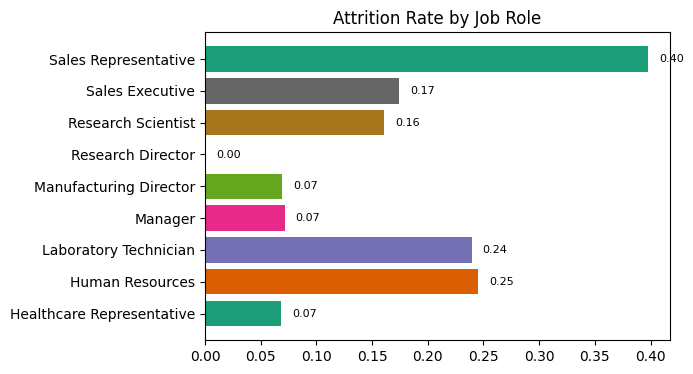

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,4))
bars = plt.barh(attrition_role['JobRole'], attrition_role['Attrition_Rate'],
         color =plt.get_cmap('Dark2').colors)
plt.title('Attrition Rate by Job Role')

for bar in bars:
    width = bar.get_width() #nilai attrition rate
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, #posisi horizontal, vertikal
             f'{width:.2f}',
             va='center',
             ha='left',
             fontsize=8)

**Question 2 Conclusion**: From the bar chart, **Sales Representative have the highest attrition rate**, with a significant **40%** leaving the job, followed by Laboratory Technician (25%) and Human Resources (24%).

## Q3. What Factors are Associated with High Attrition Rates in Job Roles with the Highest Attrition Rates?

#### Job Satisfaction and Job Role vs Attrition Rate

In [34]:
role_satis = df_clean.groupby(['JobRole', 'Job_Satisfaction_Cat'])['Attrition_Numeric'].mean().reset_index()
role_satis.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)
role_satis.sort_values('Attrition_Rate', ascending = False).head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11852\1255076403.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  role_satis = df_clean.groupby(['JobRole', 'Job_Satisfaction_Cat'])['Attrition_Numeric'].mean().reset_index()


,JobRole,Job_Satisfaction_Cat,Attrition_Rate
32,Sales Representative,Very Dissatisfied,0.583333
4,Human Resources,Very Dissatisfied,0.500000
33,Sales Representative,Dissatisfied,0.476190
8,Laboratory Technician,Very Dissatisfied,0.357143
34,Sales Representative,Satisfied,0.333333


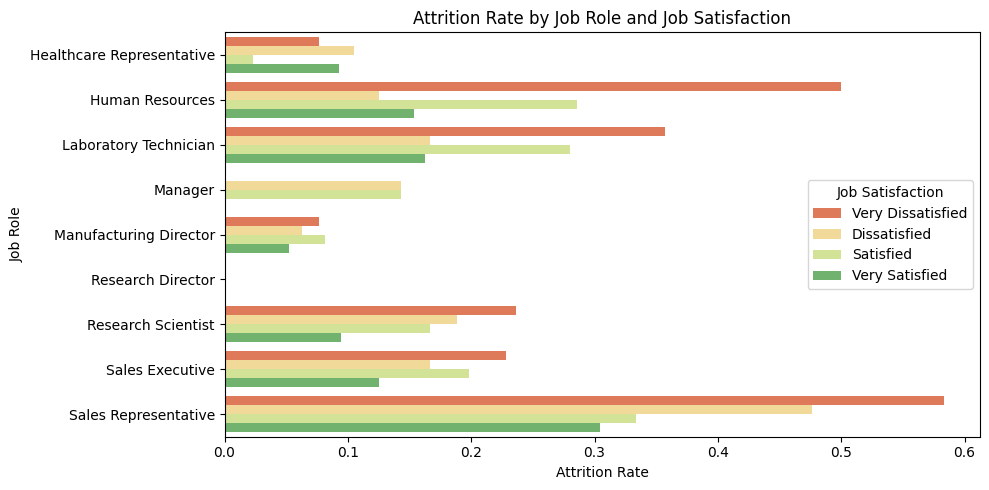

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(orient = 'h',data = role_satis, y = 'JobRole', x = 'Attrition_Rate', hue = 'Job_Satisfaction_Cat', palette = 'RdYlGn')
plt.title('Attrition Rate by Job Role and Job Satisfaction')
plt.ylabel('Job Role')
plt.xlabel('Attrition Rate')
plt.legend(title = 'Job Satisfaction') 

plt.tight_layout()
plt.show()

- From this summary, we observe that the **top 3 job roles with the highest attrition rates** (Sales Rep, Laboratory Tech, Human Resources) also have the lowest job satisfaction **(Very Dissatisfied)**.
- This suggests that **dissatisfaction with their jobs may be a key factor contributing to the high attrition rates** in these roles.

#### Over Time and Job Role vs Attrition Rate

In [36]:
role_time = df_clean.groupby(['JobRole', 'OverTime'])['Attrition_Numeric'].mean().reset_index()
role_time.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)
role_time.sort_values('Attrition_Rate', ascending = False).head(5)

,JobRole,OverTime,Attrition_Rate
17,Sales Representative,Yes,0.666667
5,Laboratory Technician,Yes,0.500000
3,Human Resources,Yes,0.384615
13,Research Scientist,Yes,0.340206
15,Sales Executive,Yes,0.329787


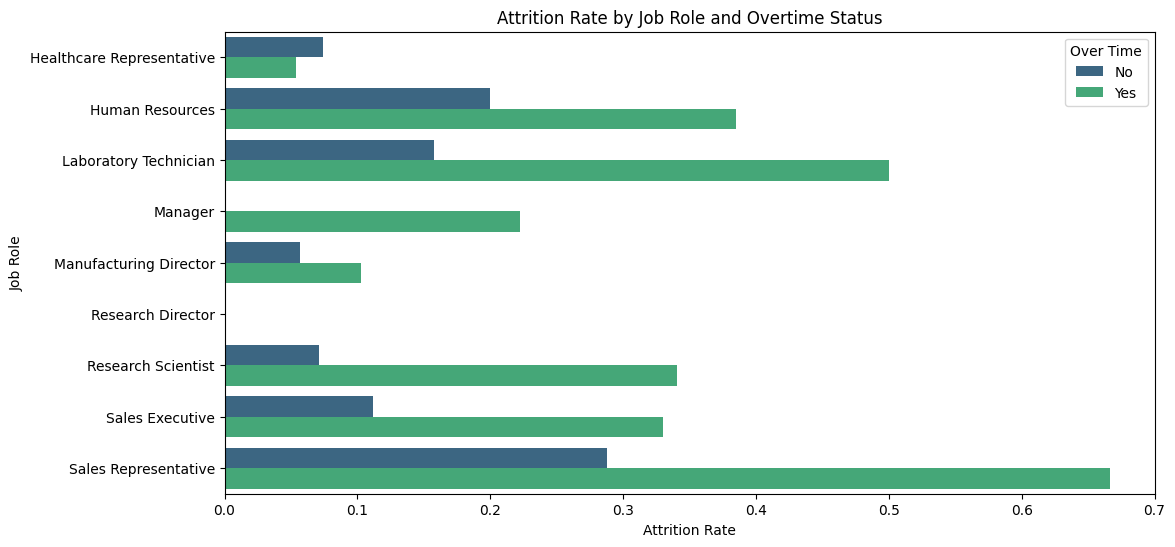

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Attrition_Rate', y='JobRole', hue='OverTime',
            data=role_time, palette='viridis')

plt.title('Attrition Rate by Job Role and Overtime Status')
plt.xlabel('Attrition Rate')
plt.ylabel('Job Role')
plt.legend(title='Over Time')
plt.show()


- From this summary, we observe that the **top 3 job roles with the highest attrition rates** (Sales Rep, Laboratory Tech, Human Resources) also have a **higher proportion of employees who work overtime.**
- This suggests that **working overtime may be a key factor contributing to the high attrition rates** in these roles.

#### Monthly Income vs Attrition Rate

In [38]:
role_income = df_clean.groupby(['JobRole'])[['Attrition_Numeric', 'MonthlyIncome']].mean().reset_index()
role_income.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)
role_income.sort_values('MonthlyIncome', ascending = True).head(5)

,JobRole,Attrition_Rate,MonthlyIncome
8,Sales Representative,0.397590,2626.000000
2,Laboratory Technician,0.239382,3250.637066
6,Research Scientist,0.160410,3262.102389
1,Human Resources,0.245283,4185.169811
7,Sales Executive,0.174312,6928.984709


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11852\725204059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MonthlyIncome', y='JobRole',


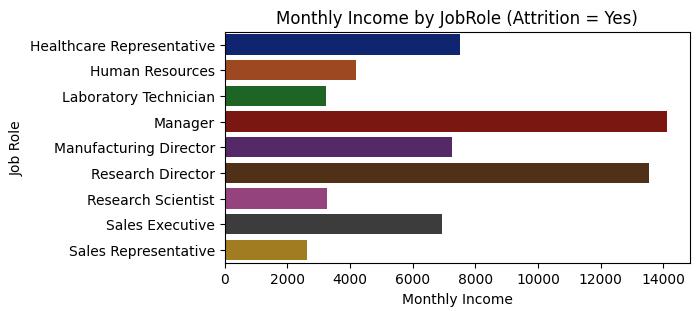

In [39]:
plt.figure(figsize=(6, 3))
sns.barplot(x='MonthlyIncome', y='JobRole',
            data=role_income, palette = 'dark')
plt.title('Monthly Income by JobRole (Attrition = Yes)')
plt.xlabel('Monthly Income')
plt.ylabel('Job Role')
plt.show()

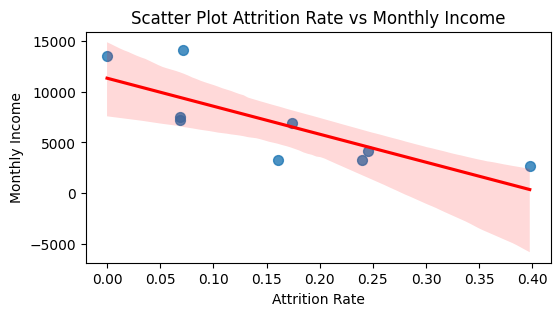

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.regplot(x='Attrition_Rate', y='MonthlyIncome', data=role_income, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot Attrition Rate vs Monthly Income')
plt.xlabel('Attrition Rate')
plt.ylabel('Monthly Income')
plt.show()

Based on the scatter plot above, there is a ***negative correlation between attrition rate and monthly income***, which means that the lower the income, the more likely employees are to leave.

**Question 3 Conclusion**: Key factors that associated with high attrition rate are job satisfaction, working over time, and monthly income

## Q4. Are There Spesific Employee Groups That Are More Likely Leave The Company?

In [41]:
def attrition_rate_by_category(df, column_name):

  attrition_df = df.groupby(column_name)['Attrition_Numeric'].mean().reset_index()
  attrition_df.rename(columns = {'Attrition_Numeric' : 'Attrition_Rate'}, inplace = True)

  attrition_df.sort_values('Attrition_Rate', ascending = False)

#Pie chart
  fig = plt.figure(figsize = (4,4))
  plt.pie(attrition_df['Attrition_Rate'], labels = attrition_df[column_name],
        autopct = '%1.2f%%', colors=plt.get_cmap('Pastel1').colors,
        startangle = 90)
  plt.title(f'Attrition Rate by {column_name}')

#### Attrition Rate by Marital Status

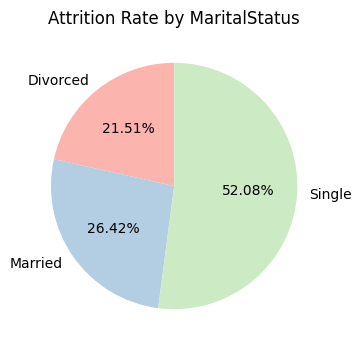

In [42]:
attrition_rate_by_category(df_clean, 'MaritalStatus')

Single employees are more likely to leave the company, possibly because they are more flexible in seeking new opportunities

#### Attrition Rate by Department

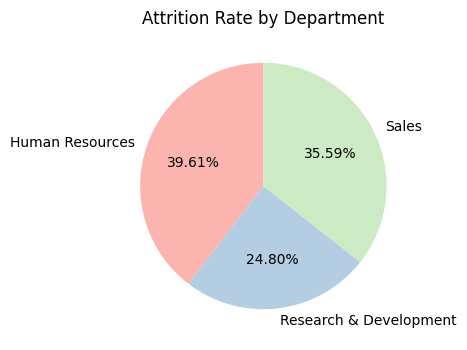

In [43]:
attrition_rate_by_category(df_clean, 'Department')

Employees in the human resources department are more likely to leave the company

#### Attrition Rate by Gender

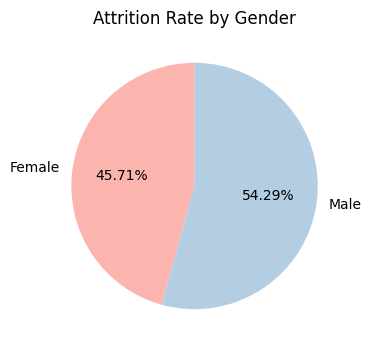

In [44]:
attrition_rate_by_category(df_clean, 'Gender')

Male employees are more likely to leave the company

### Attrition Rate by Monthly Income

In [45]:
att_yes = df_clean[df_clean['Attrition'] == 'Yes']
att_no = df_clean[df_clean['Attrition'] == 'No']

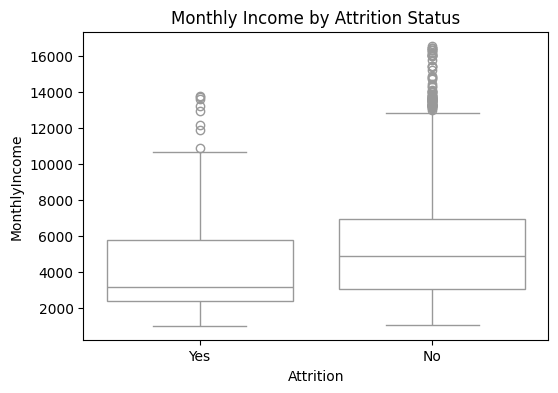

In [46]:
import seaborn as sns

fig = plt.figure(figsize = (6,4))
sns.boxplot(data = df_clean, x = df_clean['Attrition'], y = df_clean['MonthlyIncome'],color = 'white')
plt.title('Monthly Income by Attrition Status')
plt.show()

From the boxplot, we can see that employees with attrition tend to have a lower monthly income compared to employees without attrition.

### Attrition Rate by Job Satisfaction

In [47]:
satis_att = df_clean.groupby('Job_Satisfaction_Cat', as_index = False)['Attrition_Numeric'].mean()
satis_att.sort_values('Attrition_Numeric', ascending = False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11852\718871829.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satis_att = df_clean.groupby('Job_Satisfaction_Cat', as_index = False)['Attrition_Numeric'].mean()


,Job_Satisfaction_Cat,Attrition_Numeric
0,Very Dissatisfied,0.244361
2,Satisfied,0.178922
1,Dissatisfied,0.170543
3,Very Satisfied,0.119438


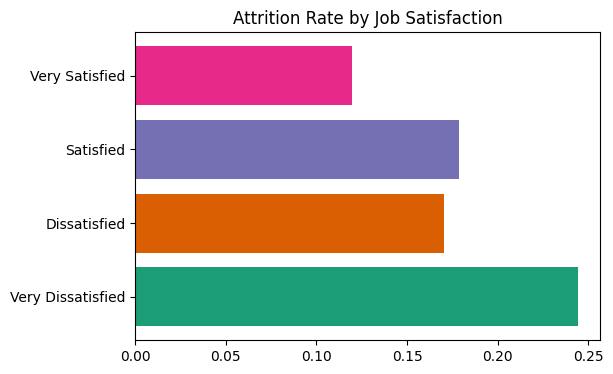

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,4))
plt.barh(satis_att['Job_Satisfaction_Cat'], satis_att['Attrition_Numeric'],
         color =plt.get_cmap('Dark2').colors)
plt.title('Attrition Rate by Job Satisfaction')
plt.show()

- Employees who are very dissatisfied with their job have the highest attrition rate (25.4%).
- This suggests that high dissatisfaction is **strongly associated** with a higher likelihood of leaving the company

### Attrition Rate by Commute Distance

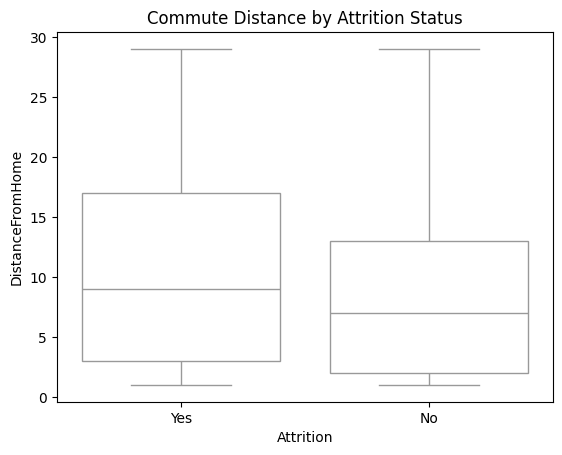

In [49]:
import seaborn as sns
sns.boxplot(df_clean, x = df_clean['Attrition'], y = df_clean['DistanceFromHome'], color = 'white')
plt.title('Commute Distance by Attrition Status')
plt.show()

Employees who have a longer distance from home are more likely to attrite



**Question 4 Conclusion**:
Groups that are more likely to leave the company include 
1. Employees who are single
2. Those in the Human Resources department
3. Male employees
4. Those earning lower monthly income
5. Employees who feel dissatisfaction with their job
6. Those who have a longer distance from home

## Q5. How does attrition trend vary across different levels of total working experience? (Tenure Analysis)

In [50]:
#create total working years bin
df_clean = df_clean.copy()
bins = [0, 10, 20, 30, 40]
labels = ['0-10', '11-20', '21-30', '31-40']
df_clean['TotalWorkingYearsBins'] = pd.cut(df_clean['TotalWorkingYears'], bins = bins, labels = labels, include_lowest = True)
df_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EmployeeNumber,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,Job_Satisfaction_Cat,Attrition_Numeric,TotalWorkingYearsBins
0,41,Yes,Travel_Rarely,1102,Sales,1,1,Female,Sales Executive,4,Single,5993,Yes,8,Very Satisfied,1,0-10
1,49,No,Travel_Frequently,279,Research & Development,8,2,Male,Research Scientist,2,Married,5130,No,10,Dissatisfied,0,0-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,4,Male,Laboratory Technician,3,Single,2090,Yes,7,Satisfied,1,0-10
3,33,No,Travel_Frequently,1392,Research & Development,3,5,Female,Research Scientist,3,Married,2909,Yes,8,Satisfied,0,0-10
4,27,No,Travel_Rarely,591,Research & Development,2,7,Male,Laboratory Technician,2,Married,3468,No,6,Dissatisfied,0,0-10


In [51]:
pd.cut(df_clean['TotalWorkingYears'], bins=bins, labels = labels, include_lowest=True).value_counts()

TotalWorkingYears
0-10     923
11-20    339
21-30     76
31-40     21
Name: count, dtype: int64

In [52]:
tenure = df_clean.groupby('TotalWorkingYearsBins')['Attrition_Numeric'].mean()
tenure

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11852\2096106399.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure = df_clean.groupby('TotalWorkingYearsBins')['Attrition_Numeric'].mean()


TotalWorkingYearsBins
0-10     0.198267
11-20    0.115044
21-30    0.105263
31-40    0.142857
Name: Attrition_Numeric, dtype: float64

In [53]:
tenure2 = df_clean.groupby('TotalWorkingYears', as_index = False)['Attrition_Numeric'].mean().round(2)
tenure2.rename(columns = {
    'Attrition_Numeric' : 'Attrition_Rate'},
    inplace = True)

tenure2 = pd.DataFrame(tenure2)
tenure2.head()

,TotalWorkingYears,Attrition_Rate
0,0,0.45
1,1,0.50
2,2,0.29
3,3,0.21
4,4,0.19


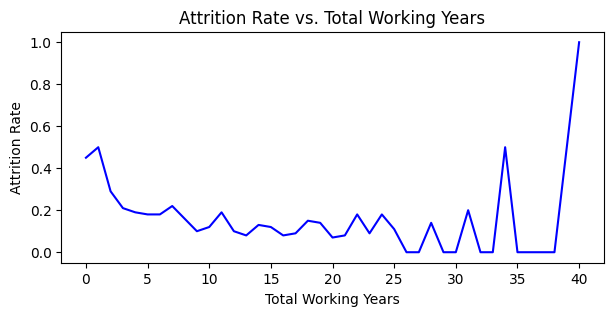

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()

ax.plot(tenure2['TotalWorkingYears'], tenure2['Attrition_Rate'],
        color='blue', linestyle='-')
ax.set_xlabel('Total Working Years')
ax.set_ylabel('Attrition Rate')
ax.set_title('Attrition Rate vs. Total Working Years')

plt.show()

- There is **decreasing trend in attrition rates for 0-10 years range**, but it still higher compared to the 11-20 and 21-30 years range, which have relatively stable and lower attrition rates
- The attrition rate **peaks significantly for employees in the 30-40 work years** range, indicating a higher likelihood of attrition among older group.

# Summary
1. Overall attrition rate in this company is **17.1%**
 
2. **Sales Representatives** have the **highest attrition rate** (**39.76%**), followed by Laboratory Technicians (24.03%) and Human Resources (23.08%)
 
3. Key factors that associated with high attrition rates in 3 job roles with the highest attrition rates are **job satisfaction, working over time, and monthly income**

4. Groups that are more likely to leave the company include employees who are single, those in the Human Resources department, male employees, those earning lower monthly income, employees who feel dissatisfaction with their job, those who have a longer distance from home
   
5. There is a **different trend in working years** for each age range.
  - Negative trend of attrition rates for employees with 0-10 years range but it still higher than 11-30 range
  - Relatively stable at 11-30 years range
  - Significant peak for employees with 31-50 years experience.

# Recommendations
1. Improve employee retention, such as identify and resolve job disssatisfaction (example by survey employees) or reviewing overtime policies.
2. Consider transportation support to reduce the impact of long commutes on employee retention.
3. Make different approach for each working years range:
  - 0-10 years: focus on improving or providing growth opportunities, such as career development.
  - 11-30 years: maintain engagement by rewarding long-term contributions
  - 31-40 years: implementing targeted retirement planning or flexible work options.